<a href="https://colab.research.google.com/github/shreyassks/Learning-Content/blob/master/Food_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv("train_fd.csv", index_col = 0)
df_test = pd.read_csv("test_fd.csv", index_col = 0)
meal_info = pd.read_csv("meal_info.csv")
center_info = pd.read_csv("fulfilment_center_info.csv")

In [116]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 1379560 to 1361984
Data columns (total 8 columns):
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(6)
memory usage: 31.3 MB


In [117]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 1028232 to 1291286
Data columns (total 7 columns):
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
dtypes: float64(2), int64(5)
memory usage: 2.0 MB


In [118]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
meal_id     51 non-null int64
category    51 non-null object
cuisine     51 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [119]:
meal_info.head(5)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [120]:
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
center_id      77 non-null int64
city_code      77 non-null int64
region_code    77 non-null int64
center_type    77 non-null object
op_area        77 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [121]:
center_info.head(5)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [122]:
train = pd.merge(df_train, center_info, on = 'center_id')
test = pd.merge(df_test, center_info, on = 'center_id')
train.head(5)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [123]:
train = pd.merge(train, meal_info, on = 'meal_id')
train.head(5)



,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [124]:
test = pd.merge(test, meal_info, on = 'meal_id')
test.head(5)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


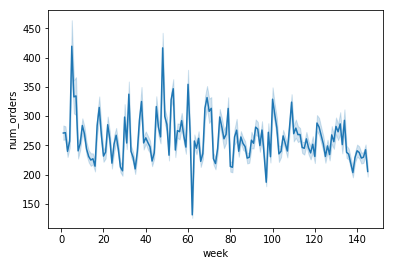

In [125]:
sns.lineplot(train['week'],train['num_orders']) # takes the mean of all num_orders in every week and plots the graph in confidence intervals

In [128]:
np.mean(train.loc[train['week'] == 3,'num_orders'])

239.82821662642291

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

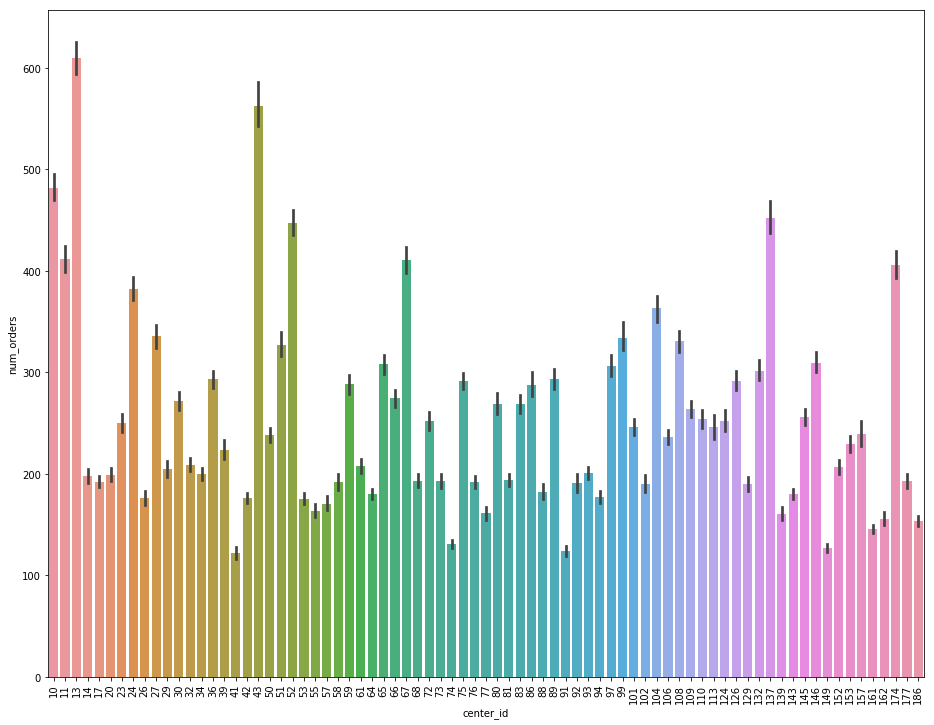

In [134]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15.7,12.27
sns.barplot(train['center_id'], train['num_orders'])
plt.xticks(rotation = 90)

In [136]:
np.mean(train.loc[train['center_id'] == 13, 'num_orders'])

609.7849843883055